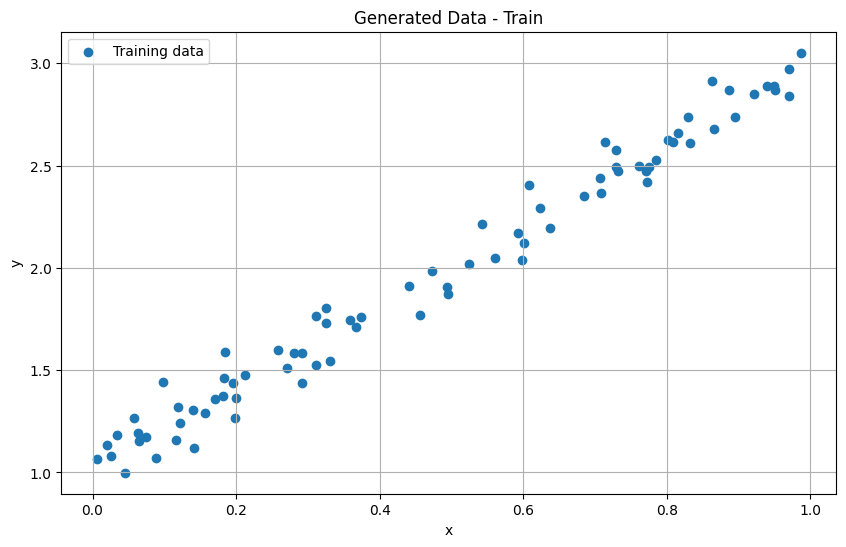

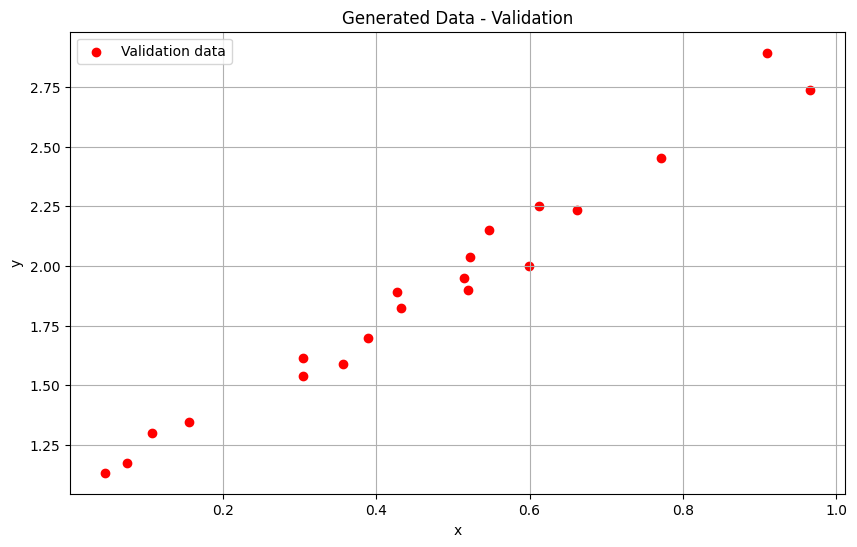

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100,1)

idx = np.arange(100)
np.random.shuffle(idx)

train_idx = idx[:80]
val_idx = idx[80:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training data')
# plt.scatter(x_val, y_val, color='red', label='Validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data - Train')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(x_val, y_val, color='red', label='Validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data - Validation')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print("Initial random values for a and b:",a, b)

Initial random values for a and b: [0.49671415] [-0.1382643]


In [3]:
lr = 1e-1
n_epochs = 1000

In [4]:
for epooch in range(n_epochs):
    yhat = a + b * x_train

    error = (y_train - yhat)

    loss = (error ** 2).mean()

    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()

    a = a - lr * a_grad
    b = b - lr * b_grad

print("Gradient Descent results for a and b:",a, b)

Gradient Descent results for a and b: [1.02354094] [1.96896411]


In [5]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)

LinearRegression()

In [6]:
print("Intercept:",linr.intercept_, "| Coefficient:", linr.coef_)

Intercept: [1.02354075] | Coefficient: [[1.96896447]]


In [7]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [9]:
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)
print('type(x_train):',type(x_train), '\ntype(x_train_tensor):',type(x_train_tensor), '\nx_train_tensor.type():',x_train_tensor.type())

type(x_train): <class 'numpy.ndarray'> 
type(x_train_tensor): <class 'torch.Tensor'> 
x_train_tensor.type(): torch.FloatTensor


In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel().to(device)

In [11]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [12]:
n_epochs = 1000
for epoch in range(n_epochs):
    y_pred = model(x_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.1887
Epoch [200/1000], Loss: 0.1095
Epoch [300/1000], Loss: 0.0828
Epoch [400/1000], Loss: 0.0633
Epoch [500/1000], Loss: 0.0489
Epoch [600/1000], Loss: 0.0382
Epoch [700/1000], Loss: 0.0304
Epoch [800/1000], Loss: 0.0245
Epoch [900/1000], Loss: 0.0202
Epoch [1000/1000], Loss: 0.0171


In [13]:
make_dot(y_pred, params= dict(model.named_parameters())).render('graph', format='png')

'graph.png'

In [14]:
from torchsummary import summary

# Display the model architecture
summary(model, input_size=(1,)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               2
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [15]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [16]:
from torchsummary import summary

# Display the model architecture
summary(model, input_size=(1,)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               2
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [17]:
#First
# Initializes parameters "a" and "b" randomly, ALMOST as we did in Numpy
# since we want to apply gradient descent on these parameters, we need
# to set REQUIRES_GRAD = TRUE

In [18]:
a = torch.randn(1, requires_grad = True, dtype = torch.float)
b = torch.randn(1, requires_grad = True, dtype = torch.float)
print(a, b)

tensor([1.5463], requires_grad=True) tensor([-0.6051], requires_grad=True)


In [19]:
# SECOND
# But what if we want to run it on a GPU? We could just send them to device, right?

In [20]:
a = torch.randn(1, requires_grad = True, dtype = torch.float).to(device)
b = torch.randn(1, requires_grad = True, dtype = torch.float).to(device)
print(a, b)

tensor([-0.7939], requires_grad=True) tensor([0.3377], requires_grad=True)


In [21]:
# THIRD
# We can either create regular tensors and send them to the device (as we did with our data)

In [22]:
a = torch.randn(1, dtype = torch.float).to(device)
b = torch.randn(1, dtype = torch.float).to(device)

a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([-1.2386], requires_grad=True) tensor([1.5473], requires_grad=True)


In [23]:
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)

a = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    # print('a.grad:',a.grad)
    # print('b.grad:',b.grad)

    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad

    a.grad.zero_()
    b.grad.zero_()

print('a:',a, 'b:', b)

a: tensor([1.0235], requires_grad=True) b: tensor([1.9690], requires_grad=True)


In [24]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()


In [25]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap them with nn.Parameter
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.a + self.b * x

In [26]:
torch.manual_seed(42)
model = ManualLinearRegression().to(device)

print(model.state_dict())

OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288]))])


In [27]:
lr = 1e-1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction = 'mean')
optimizer = optim.SGD(model.parameters(), lr = lr)

for epoch in range(n_epochs):
    model.train()

    yhat = model(x_train_tensor)

    loss = loss_fn(y_train_tensor, yhat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(model.state_dict)

<bound method Module.state_dict of ManualLinearRegression()>
